In [5]:
import sys
import os

SCRIPT_PATH = os.path.join(os.path.abspath(os.path.dirname('../__file__')), 'script')
sys.path.insert(0, SCRIPT_PATH)


from markov_pyactup import *
from statsmodels.formula.api import logit, glm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


main_dir = os.path.dirname(os.getcwd())
subject_dir = os.path.join(main_dir, 'data', 'human', '"online_data')
pr_dir = os.path.join(main_dir, 'data', 'model', 'param_recovery')
main_dir, subject_dir

sns.set_theme(style="white", rc={"axes.spines.right": True, "axes.spines.top": True}, font_scale=1.3)

## Run Parameter Recovery 

In [6]:
MarkovSimulation.simulate_param_recovery(pr_dir=pr_dir, verbose=True)

## Correlation

In [7]:
df_ori = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(pr_dir, '*ori*', '*'))], axis=0).melt(id_vars=['subject_id', 'estimate_model'], var_name='param_name', value_name='param_value').sort_values(by = ['subject_id', 'estimate_model'])
df_rec = pd.concat([pd.read_csv(f) for f in glob.glob(os.path.join(pr_dir, '*rec*', '*'))], axis=0).melt(id_vars=['subject_id', 'estimate_model'], var_name='param_name', value_name='param_value').sort_values(by = ['subject_id', 'estimate_model'])

In [8]:
dfm = pd.merge(df_ori.drop(['estimate_model'], axis=1), df_rec.drop(['estimate_model'], axis=1), 
         on=['subject_id', 'param_name'], suffixes=('.ori', '.rec'))

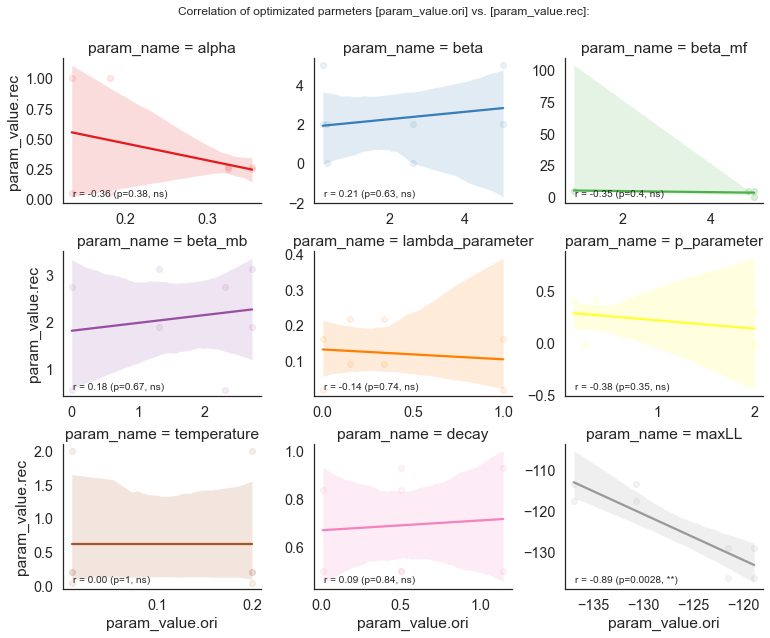

In [10]:
MarkovPlot.parameter_lm_plot(df=dfm, x_name='param_value.ori', y_name='param_value.rec', exclude_parameters=['lf', 'fixed_cost'], alpha=.1)